Trabajo Practico Final Matematica 3
La base de datos seleccionada contiene los registros médicos de 5000 pacientes que padecieron insuficiencia cardíaca, recopilados durante su período de seguimiento, donde cada perfil de paciente tiene 13 características clínicas. La idea es aplicar conceptos de matemática y programación para el diseño, implementación y evaluación de una red neuronal desde cero, utilizando únicamente Pandas y NumPy para predecir si un paciente sobrevivirá o no.

In [8]:
import pandas as pd

# Se cargan los datos de un archivo CSV y ajustamos los nombres de las columnas.
df = pd.read_csv('heart_failure_clinical_records.csv', delimiter=',', decimal='.')
df.columns = ['Age','Anaemia','CPK','Diabetes','Ejection Fraction','High Blood Pressure','Platelets','Serum Creatinine','Serum Sodium','Sex','Smoking','Time','Death Event']

df.head() # Primeras filas del DataFrame

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [9]:
df.tail(10) # Ultimas 10 filas de los registros de los pacientes.

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
4990,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209,0
4991,53.0,1,582,0,45,0,305000.0,1.1,137,1,1,209,0
4992,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120,0
4993,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4994,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


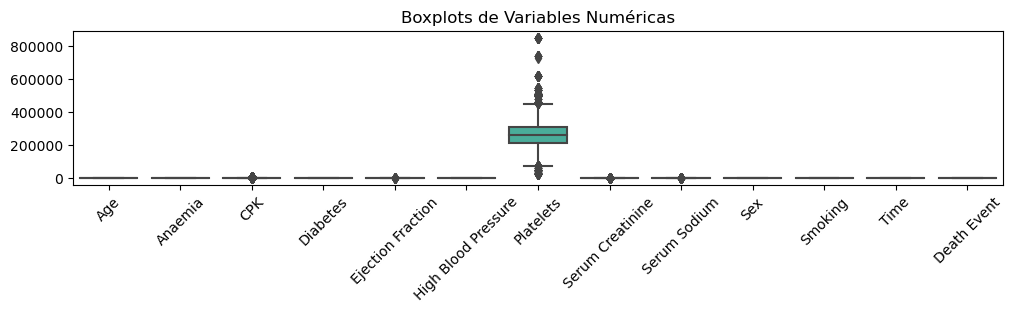

Número de Filas con Valores Atípicos: 1172


In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Se seleccionan solo las columnas numéricas para el análisis de valores atípicos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para cada variable numérica 
#El boxplot me permite visualizar la dispersión, la mediana y la presencia de valores atípicos
plt.figure(figsize=(12, 2))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Número de Filas con Valores Atípicos:", num_outliers)

#La caja central para cada variable representa el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) al tercer cuartil (Q3).
#La línea dentro de la caja representa la mediana (Q2) de los datos para esa variable 
#Los valores atipicos son los puntos individuales para varias variables.

En la representación grafica anterior podemos ver que la variables Platelets tiene una gran cantidad de valores atipicos (outliers).
Ejection Fraction, Serum Creatinine, Serum Sodium y 'CPK': También muestran algunos outliers, pero no tantos como 'Platelets'.
La mayoría de las otras variables tienen distribuciones mucho más ajustadas con pocos o ningún outlier visible en esta escala.

La mayoría de las otras variables tienen distribuciones mucho más ajustadas con pocos o ningún outlier visible en esta escala.

In [26]:
# Calcular la mediana de cada columna numérica
medians = df[numeric_columns].median()

# Mostrar las medianas de las variables numéricas
print("\n\tMediana de Variables Numéricas:\n", medians)


	Mediana de Variables Numéricas:
 Age                        60.00
Anaemia                     0.00
CPK                       248.00
Diabetes                    0.00
Ejection Fraction          38.00
High Blood Pressure         0.00
Platelets              263358.03
Serum Creatinine            1.10
Serum Sodium              137.00
Sex                         1.00
Smoking                     0.00
Time                      113.00
Death Event                 0.00
dtype: float64


In [27]:
df.describe() # Resumen estadistico

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


A continuación se normalizan las columnas que no estan entre 0 y 1, dividiendo por el maximo de cada columna, para evita un desbalance en la escalas de las variables.

In [28]:
column= ['Age', 'CPK', 'Ejection Fraction', 'Platelets', 'Serum Creatinine', 'Serum Sodium','Time']

#Estandarizo las etiquetas dividiendo cada columna de estas por el maximo de esa columna para que sean datos entre 0 y 1
df[column] = df[column] / df[column].max()
df.describe()

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.634618,0.474400,0.074642,0.439400,0.471683,0.364800,0.311853,0.145650,0.924380,0.645600,0.311800,0.458522,0.313600
std,0.123129,0.499394,0.124251,0.496364,0.143936,0.481422,0.115294,0.107420,0.030164,0.478379,0.463275,0.271319,0.464002
min,0.421053,0.000000,0.002926,0.000000,0.175000,0.000000,0.029529,0.053191,0.763514,0.000000,0.000000,0.014035,0.000000
25%,0.526316,0.000000,0.015392,0.000000,0.375000,0.000000,0.252941,0.095745,0.905405,0.000000,0.000000,0.259649,0.000000
50%,0.631579,0.000000,0.031548,0.000000,0.475000,0.000000,0.309833,0.117021,0.925676,1.000000,0.000000,0.396491,0.000000
75%,0.715789,1.000000,0.074036,1.000000,0.562500,1.000000,0.364706,0.148936,0.945946,1.000000,1.000000,0.705263,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.corr()

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
Age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
Anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
CPK,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
Diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
Ejection Fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
High Blood Pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
Platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
Serum Creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
Serum Sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
Sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


Analizamos la correlación de los datos mediante un mapa de calor.
Muchas variables no estan fuertemente correlacionadas con la variable que me interesa Death Event.
Las variables que muestran una correlación moderada con Death Event son:
Age: La edad avanzada se asocia con un mayor riesgo de muerte en pacientes con insuficiencia cardíaca.
Ejection Fraction: La fracción de eyección mide el porcentaje de sangre que el ventrículo izquierdo expulsa con cada contracción. Una fracción de eyección baja indica una función cardíaca deficiente, lo que se asocia con un mayor riesgo de complicaciones y muerte en pacientes con insuficiencia cardíaca.
Serum Creatinine: Los niveles elevados de creatinina en sangre indican una función renal deficiente. La insuficiencia renal es un factor de riesgo significativo para el pronóstico en pacientes con insuficiencia cardíaca, ya que ambos órganos están estrechamente relacionados en su función.
Serum Sodium: Los niveles de sodio en sangre pueden reflejar el estado de hidratación y la función renal. La hiponatremia (bajo nivel de sodio) es un marcador común en pacientes con insuficiencia cardíaca avanzada y se asocia con un peor pronóstico.
Time: El seguimiento del tiempo desde el diagnóstico o desde el inicio de un tratamiento específico puede proporcionar información sobre la progresión de la enfermedad y la efectividad de las intervenciones terapéuticas.
Por lo tanto estas variables pueden ser importantes para evaluar el riesgo de muerte en pacientes con insuficiencia cardíaca.

Es bueno saber que la correlación de Platelets con Death Event es baja ya que este presentaba mayor cantidad de valores atipicos, por lo tanto no lo consideramos para los valores de entrada de la Red Neuronal.

[Text(0, 0, 'Age'),
 Text(0, 1, 'Anaemia'),
 Text(0, 2, 'CPK'),
 Text(0, 3, 'Diabetes'),
 Text(0, 4, 'Ejection Fraction'),
 Text(0, 5, 'High Blood Pressure'),
 Text(0, 6, 'Platelets'),
 Text(0, 7, 'Serum Creatinine'),
 Text(0, 8, 'Serum Sodium'),
 Text(0, 9, 'Sex'),
 Text(0, 10, 'Smoking'),
 Text(0, 11, 'Time'),
 Text(0, 12, 'Death Event')]

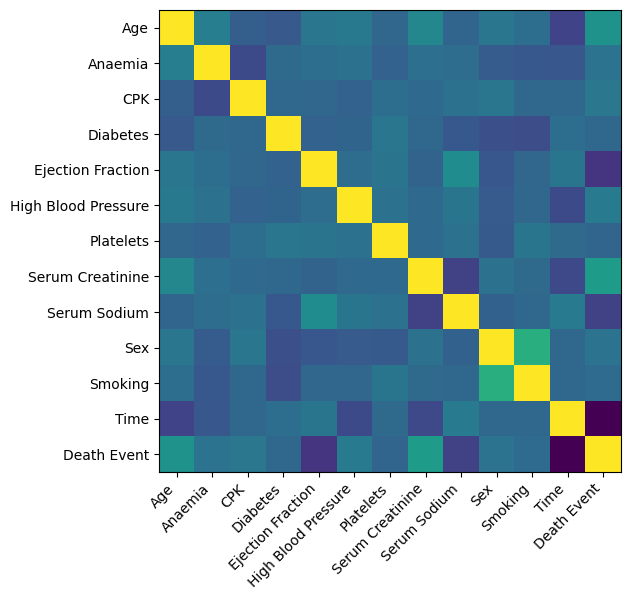

In [31]:
import matplotlib.pyplot as plt
labels = df.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow((df.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df.columns.to_list(), ha='right')

Fordward Propagation
Solo considero los datos que me interesan

In [60]:
from sklearn.model_selection import train_test_split

column = ['Age','Ejection Fraction', 'Serum Creatinine','Serum Sodium', 'Time']

X = df[column].values
Y = df['Death Event'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

# Número de registros de entrenamiento
n = X_train.shape[0]

np.random.seed(42)
# Construir red neuronal con pesos y sesgos, inicializados aleatoriamente
w_hidden = np.random.rand(4, 5)
w_output = np.random.rand(1, 4)

b_hidden = np.random.rand(4, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Función q ejecuta entradas a través de la red neuronal para obtener salidas predichas
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] 
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binario
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales
print("ACCURACY: ", accuracy)


#El valor de precisión (accuracy) significa que aproximadamente el 31.37% de las predicciones 
# realizadas por la red neuronal en el conjunto de prueba (X_test) fueron correctas. Es relativamente bajo :(

ACCURACY:  0.3137372525494901


Se realiza el descenso de gradiente estocástico para entrenar la Red Neuronal

In [62]:
L = 0.05  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(100000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    #Actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]  
test_predictions = (test_predictions >= 0.5).astype(int) # Convertir las predicciones en valores binarios
accuracy = np.mean(test_predictions == Y_test.reshape(-1, 1)) # Calcular la precisión comparando las predicciones con los valores reales
print("ACCURACY: ", accuracy)

# El valor de precisión (accuracy) es  58.9% (mayor q el anterior) indica la proporción  de predicciones correctas realizadas 
# por la red neuronal en el conjunto de prueba (X_test) después de entrenarla mediante el descenso de gradiente. Es muy bajo :()

ACCURACY:  0.589053035223789
